In [1]:

from robot.controllers.oculus import BimanualVRController
oculus = BimanualVRController(pos_action_gain=10) 
assert oculus.get_info()["controller_on"], "ERROR: oculus controller off"
print("Oculus Connected")
    

Oculus Connected


Exception in thread Thread-5:
Traceback (most recent call last):
  File "/home/prior/miniconda3/envs/polytf/lib/python3.8/threading.py", line 932, in _bootstrap_inner
    self.run()
  File "/home/prior/miniconda3/envs/polytf/lib/python3.8/site-packages/ipykernel/ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "/home/prior/miniconda3/envs/polytf/lib/python3.8/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "/home/prior/polymetis_franka/robot/controllers/oculus.py", line 358, in _update_internal_state
    continue
KeyError: 'RG'


In [ ]:
info = oculus.get_info()
info["success"]

### Method 0: Time-Based (Doesn't work) -> real-time reading -> too sensitive

In [ ]:
import time
num_steps = 2000

lock_rotation = False
def toggle_lock_rotation():
    global lock_rotation
    lock_rotation = not lock_rotation
threhsold = 0.7

start_episode = False

while not start_episode:
    info = oculus.get_info()
    if info["success"]:
        start_episode = True
        break

print("start recording")
time.sleep(2)


button_buffer = []
for i in range(num_steps):
    info = oculus.get_info()
    # print(info)
    if info["success"]:
        button_buffer.append(time.time())
        print(button_buffer)
    
    # len(button_buffer) in [1, 2]
    if len(button_buffer) == 2:
        time_diff = button_buffer[-1] - button_buffer[-2]

        if time_diff < threhsold:
            toggle_lock_rotation()
            print("Lock rotation toggled: ", lock_rotation)
        button_buffer = []
    elif len(button_buffer) == 1:
        if button_buffer[-1] - time.time() > threhsold:
            print("End of episode")
            break
    time.sleep(1/ 15)

start recording
[1744758425.415551]
[1744758425.415551, 1744758428.5532467]
[1744758428.620068]
[1744758428.620068, 1744758433.8293724]
[1744758433.8962307]
[1744758433.8962307, 1744758438.7031665]
[1744758438.7700062]
[1744758438.7700062, 1744758438.8367867]
Lock rotation toggled:  True
[1744758442.9092395]
[1744758442.9092395, 1744758442.9760642]
Lock rotation toggled:  False
[1744758443.0428555]
[1744758443.0428555, 1744758445.5797808]
[1744758445.6466563]
[1744758445.6466563, 1744758446.8491228]
[1744758446.9159665]
[1744758446.9159665, 1744758448.0508492]
[1744758448.1176896]


KeyboardInterrupt: 

In [12]:
len(time_diff_buffer)



95

Mean time difference: 0.3466 seconds
Variance: 0.1474 seconds²
Standard deviation: 0.3839 seconds


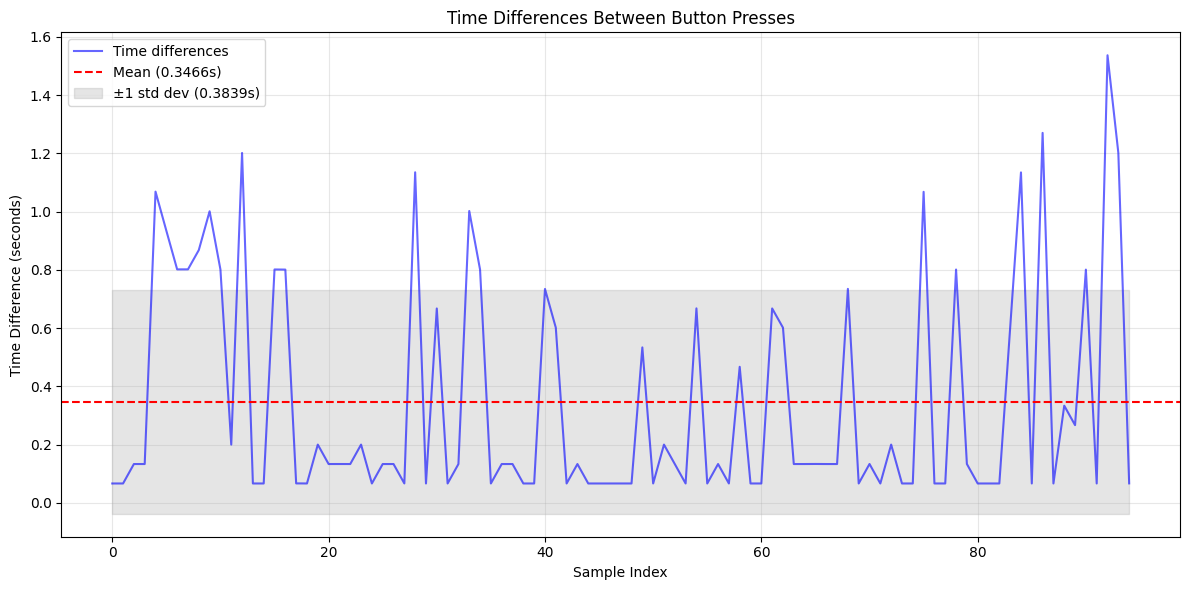

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Convert to numpy array for easier calculations
time_diffs = np.array(time_diff_buffer)

# Calculate statistics
mean_time = np.mean(time_diffs)
var_time = np.var(time_diffs)
std_time = np.std(time_diffs)

print(f"Mean time difference: {mean_time:.4f} seconds")
print(f"Variance: {var_time:.4f} seconds²")
print(f"Standard deviation: {std_time:.4f} seconds")

# Create the plot
plt.figure(figsize=(12, 6))

# Plot the time differences
plt.plot(time_diffs, 'b-', label='Time differences', alpha=0.6)
plt.axhline(y=mean_time, color='r', linestyle='--', label=f'Mean ({mean_time:.4f}s)')

# Fill between mean ± standard deviation
plt.fill_between(range(len(time_diffs)), 
                 mean_time - std_time, 
                 mean_time + std_time, 
                 color='gray', 
                 alpha=0.2, 
                 label=f'±1 std dev ({std_time:.4f}s)')

plt.title('Time Differences Between Button Presses')
plt.xlabel('Sample Index')
plt.ylabel('Time Difference (seconds)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()